### Customer Segmentation

**Flow of tasks**

1. Data Preparation (4 Marks)
    - Filter the data and keep only the following columns: total day calls, total night calls, total eve calls, total intl calls (4 Marks)
    - Perform Min-Max scaling on the data

2. Performing KMeans (16 Marks)
    - Check Silhouette Curve (4 Marks)
    - Check Elbow Curve (4 Marks)
    - Run KMeans with final value of K (4 Marks)
    - Assign the labels back to the original data
    - Plot scatter plot to visulize the clusters (4 Marks)

3. Cluster Profiling (10 Marks)
    - Check the average of various features to understand the properties of various groups
    - Write your inferences using the results generated. (10 Marks)
 

In [2]:
# Read the file

# 1. Read the file
import os     
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn import metrics, model_selection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

%matplotlib inline

pd.set_option('display.max_columns', 50)

churn=pd.read_csv('telcom.csv')
churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
def numericalise(churn):
    churn = churn.copy()
    for col in churn.select_dtypes(include='O').columns:
        churn[col] = churn[col].astype("category").cat.codes
    return churn

In [7]:
churnN= numericalise(churn)
churnN.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,1575,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,1117,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1707,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,110,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
churnN["churn"] = churnN["churn"].astype(int)
churnN.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,1926,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,1575,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1117,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1707,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,110,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
# Analysis-1.1
# Filter the cluster dataframe and keep only the following columns: total day calls, total night calls, total eve calls, total intl calls
# The filtered data frame should only have 4 columns as mentioned above

# Write your code here
# Hint: https://stackoverflow.com/a/48198034

In [17]:
cluster= churnN[['total day calls','total night calls','total eve calls','total intl calls']]
cluster.head()

,total day calls,total night calls,total eve calls,total intl calls
0,110,91,99,3
1,123,103,103,3
2,114,104,110,5
3,71,89,88,7
4,113,121,122,3


In [18]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   total day calls    3333 non-null   int64
 1   total night calls  3333 non-null   int64
 2   total eve calls    3333 non-null   int64
 3   total intl calls   3333 non-null   int64
dtypes: int64(4)
memory usage: 104.3 KB


In [19]:
cluster.describe()

,total day calls,total night calls,total eve calls,total intl calls
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.435644,100.107711,100.114311,4.479448
std,20.069084,19.568609,19.922625,2.461214
min,0.000000,33.000000,0.000000,0.000000
25%,87.000000,87.000000,87.000000,3.000000
50%,101.000000,100.000000,100.000000,4.000000
75%,114.000000,113.000000,114.000000,6.000000
max,165.000000,175.000000,170.000000,20.000000


In [20]:
# Analysis-1.2
# Here we need to scale the cluster data as created in the previous step
# We will be using min-max scaler
# You are not required to write any code over here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cluster_scale = scaler.fit_transform(cluster)

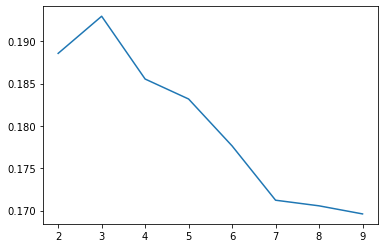

In [21]:
# Analysis-2.1
# Here you need to check the silhouette curve
# Here you don't need to write any code
# Mention your inference about the plot

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(cluster_scale)
    sse_.append([k, silhouette_score(cluster_scale, kmeans.labels_)])
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

- **Explain the above generate plot**
- **Exlain what is silhouette score and how it's useful in the KMean process?**

In [24]:
#The resultant plot is given below with x axis as number of cluster and y axis as the silhouette value. This is a step undertaken to identify the optimal value of the number of clusters in the given dataset.
# When we undertake hyperparaemter tuning there are two ways we can adopt to arrive at the optimal value of the number of clusters in the dataset. THe sillhoutte value  tell us how similar a set is to its own cluster as comparet to other clusters, and the term used is chhesion and separation respectively.THe silhoutte ranges between [1,-1].A high value implies it mathes well to neighbouring clusters and low value implies poor matching.
## From the graph we can see the "3" provides the best amtch or the highest value of silhoutte score.Implying that for or n_clusters=3, all the clusters are of best match or similar in nature and can be considered as best ‘k’

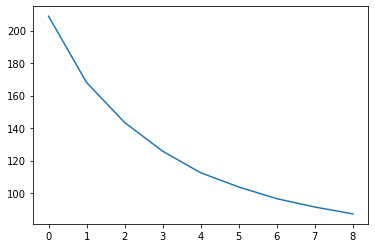

In [22]:
# Analysis-2.2
# Here you need to check the elbow curve
# Here you don't need to write any code
# Mention your inference about the plot

ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters)
    model_clus.fit(cluster_scale)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

- **Explain the above generate plot**
- **Exlain what is Elbow Curve and how it's useful in the KMean process?**

In [ ]:
# Elbow method is another emperical method to identify the optimal numebrof clusters in a given dataset for Kmean clustering. Here the average distance of each point in acluster to centroid is found and represented on a plot .To chose k we look at a sudden fall(eg: sharp slope change)>THis resembles an anatomical elbow hence the point of "k" is where there apparent elbow bend.
# The elbow curve is helpful but we can see that there are a range of clusters that can qualify for "k" value, i.e 2,3,4,5. Thus leading to some ambiguity, whereas the Silhouette analysis was more helpful in identifying k easily. APart from this the silhoutte curve analysis can also help find outliers if present in a cluster.

In [ ]:
# Analysis-2.3
# Here we need to run the final KMean clustering based on the value of K as chosen by you

# Write your code here
# use random_state=0
# Use the data "cluster_scale"

In [70]:
cluster_kmean=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = cluster_kmean.fit_predict(cluster_scale)

In [71]:
# Analysis-2.4
# Here we will be assigning the labels generated through k-mean clustering to the original dataframe: 'cluster'
cluster['labels'] = cluster_kmean.labels_

<AxesSubplot:xlabel='total night calls', ylabel='total intl calls'>

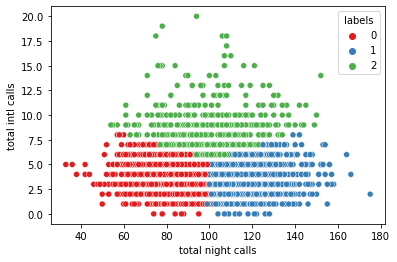

In [72]:
# Analysis-2.5
# Here we need to visulize the cluster as formed by the algorithm
sns.scatterplot(x='total night calls',y='total intl calls',hue='labels',legend='full',data= cluster, palette = 'Set1')

# Write your inferences about the plot generated

**Explain the plot**

In [73]:
# The plot shows the partition or divide of observations into 3 clusters where each observation is coming from the cluster with the nearest mean (cluster centers or cluster centroid, serving as a prototype of the cluster
# As we chose k = 3 based on the above analyses the partitions in this plot look well divided
##The visual representation of the clusters can be taken to ascertain the good performance as the clusters did not majorly overlapped, and cluster assignments were much better than random

In [74]:
# Analysis-3.1
# Here we will be checking the cluster mean for various cluster generated
cluster.groupby('labels').mean()

,total day calls,total night calls,total eve calls,total intl calls
labels,,,,
0,100.876723,83.079632,98.953292,3.569678
1,100.046886,116.428571,101.243223,3.550183
2,100.367069,100.048338,100.077039,8.190332


In [75]:
# Analysis-3.2
# Here you are required to explain the results generated above
# Explain various clusters and their properties

# Write 2 inferences about each cluster and its property


In [77]:
# The K means works by dividing / splitting the data into various clusters, and we had chosen an optimal number of clusters as 3 and based on that the mean values for a cluster of three are shown in the table. Option of label 2 seems to be a more an ideal on as it appears to be more even from a value of k where a centroid around which the data points will gather.
## The mean values here will help us cluster customers according for designing a suitable plan as the tarifs can be calulated and set as per this and we will have clear buckets /classification of customers for suitable /customizable packages.

In [ ]:
#Label 0 categorizes clusters with relatively low mean night calls 
#Label 1 categorizes clusters with relaitvely high night calls
##Label 2 categorizes clusters with relatively high international calls 